In [114]:
%load_ext autoreload
%autoreload 2

import cv2
from pathlib import Path
import numpy as np
import sys
sys.path.append('..')
from robustpca.general import ROOT_DIR

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [115]:
yale_data_dir  = Path(ROOT_DIR, 'data', 'CroppedYale')
assert yale_data_dir.exists()

$sgn(X)max(|X| - \lambda U(CC^{\top})^{-1}) , X = (Y - P)C^T(CC^T)^{-1}$

In [116]:
human_id = 1

faces = []
for face_path in sorted(list(yale_data_dir.glob('*')))[human_id].glob('*.pgm'):
    arr = cv2.imread(face_path.as_posix())[:, :, 0]
    faces.append(arr)

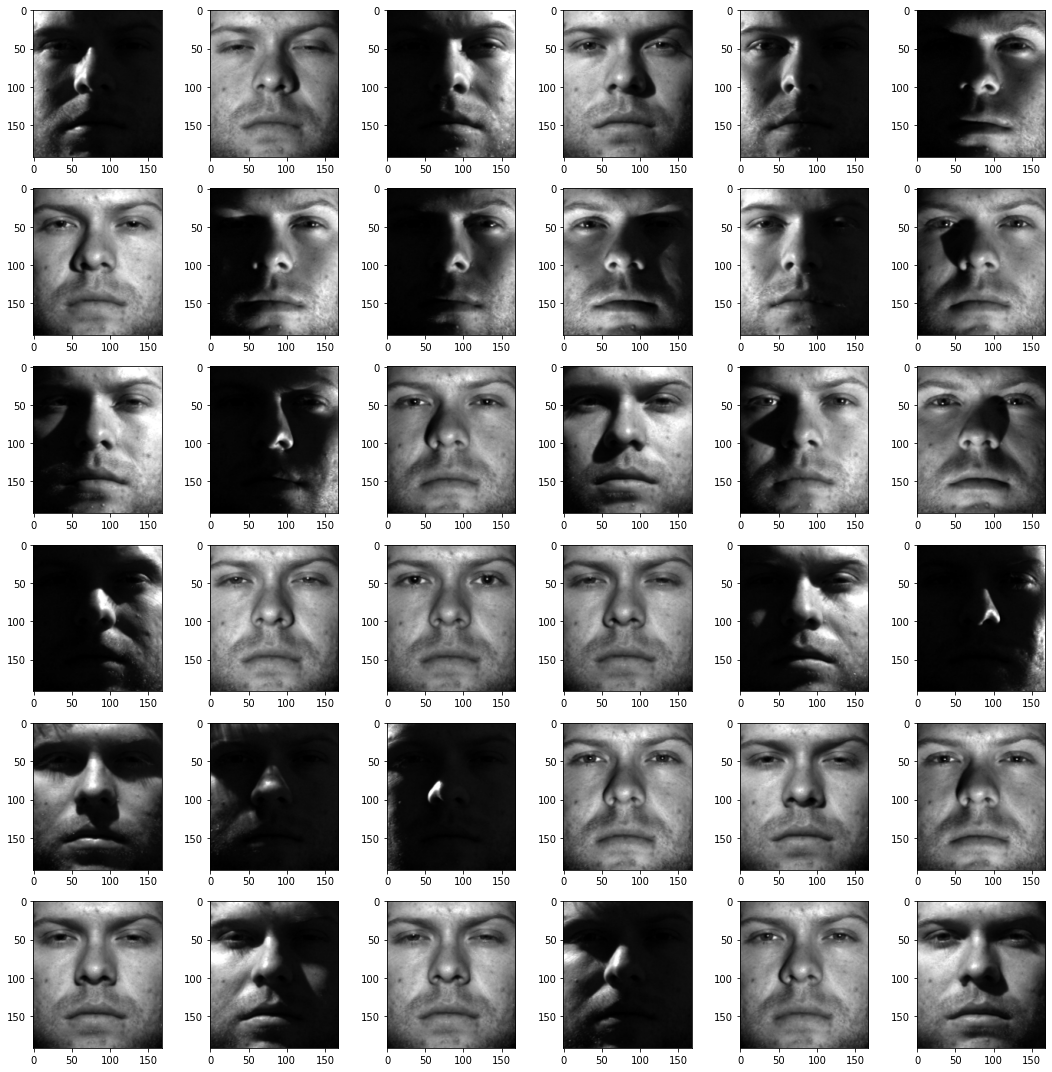

In [117]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(6, 6, figsize=(15, 15))

for i, ax in enumerate(axs.flatten()):
    ax.imshow(faces[i], cmap='gray')

fig.tight_layout()

In [118]:
data_mat = np.stack(faces, -1).reshape(-1, len(faces))
# data_mat = data_mat.T
data_mat.shape

(32256, 65)

In [6]:
np.random.seed(0)
n, d = data_mat.shape
m = 30
C = np.random.normal(0, 1, (d, m))
# C += np.eye(d)[:d, :m]
Y = data_mat @ C

In [7]:
from robustpca.pcp import CompressedPCP

In [87]:
comppcp_iterative = CompressedPCP()
mu = comppcp_iterative.default_mu(Y)
P, S = comppcp_iterative.decompose(Y, C, 0.003, d, lamda=20, tol=1e-6, max_iter=300, verbose=True)

Iteration: 300, error: 0.0021433764055606083, terminating alg.
Elapsed: 97.04


In [88]:
np.linalg.matrix_rank(P), (S != 0).mean()

(22, 0.6963050404456654)

In [338]:
id = -41

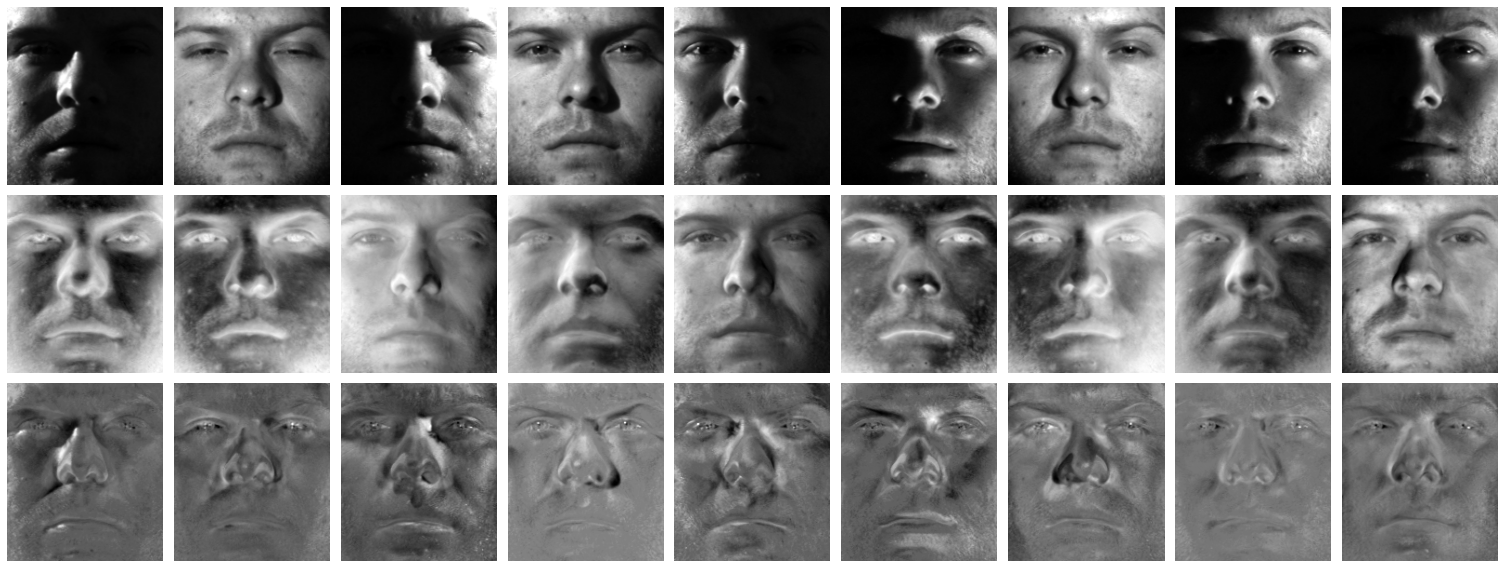

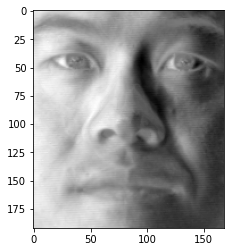

In [339]:
plt.imshow((P @ np.linalg.pinv(C))[:, id].reshape(faces[0].shape), cmap="gray")

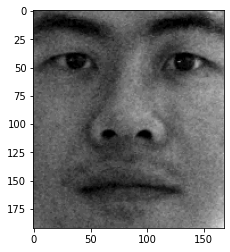

In [340]:
plt.imshow(faces[id], cmap="gray")

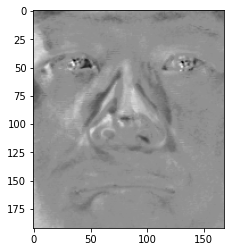

In [341]:
plt.imshow(S[:, id].reshape(faces[0].shape), cmap="gray")